In [1]:
import pandas as pd
import json
import calendar
from datetime import datetime,date

In [2]:
with open("messages.json",encoding="utf-8") as f:
    data = json.load(f)


In [3]:

def date_to_day(date):
    date_object = datetime.strptime(date,'%Y-%m-%d').date()
    x = calendar.day_name[date_object.weekday()]
    return x
def insert_into_df(dataframe,valueList):
    dataframe.loc[-1] = valueList
    dataframe.index = dataframe.index + 1
    dataframe = dataframe.sort_index()

In [4]:
df = pd.DataFrame(columns=['id','date','person','msg','link','forwarded'])
users= []

In [5]:
for i in data['messages']:
    if i['type'] == 'message':
        if type(i['text']) != list:
            valueList = [i['id'],i['date'],i['from'],i['text'],"", False]
        elif type(i['text']) == list:
            textList = i['text']
            textToAdd = ""
            linkToAdd = ""
            for text in textList:
                if type(text)==dict:
                    if text['type'] == 'link':
                        linkToAdd += text['text'] + " "
                    else:
                        textToAdd += text['text'] + " "
                else:
                    textToAdd += text
            valueList = [i['id'],i['date'],i['from'],textToAdd,linkToAdd,False]
        if 'forwarded_from' in i:
            valueList[-1] = True
        insert_into_df(df, valueList)
        if i['from'] not in users:
            users.append(i['from'])


In [6]:
df.head()


,id,date,person,msg,link,forwarded
2275,2,2021-11-03T20:43:40,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,False
2274,3,2021-11-04T01:24:32,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,The Ludicrous Hypocrisy of Climate Conferences...,https://link.theepochtimes.com/mkt_app/the-lud...,False
2273,4,2021-11-08T01:15:55,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,https://www.timescolonist.com/bc-news/bc-docto...,False
2272,5,2021-11-12T23:25:30,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,True
2271,6,2021-11-13T18:05:29,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,False


In [7]:
#df.to_csv("relationship.csv",index=False)

In [8]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pheng\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pheng\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\pheng\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\pheng\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [9]:
def recognize_entity(sentence):
    for sent in nltk.sent_tokenize(sentence):
        result = []
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                print(chunk.label(), ' '.join(c[0] for c in chunk))
                result.append(chunk)

        return result

In [10]:
df['entities'] = df['msg'].apply(recognize_entity)

ORGANIZATION Ludicrous Hypocrisy
PERSON Climate Conferences Continues
PERSON Bill
GPE Bitcoin
ORGANIZATION CO2
GPE Industrial
GPE Greta
ORGANIZATION Thunberg
ORGANIZATION US
GPE EU
GPE Russia
GPE China
GPE China
GPE Growth
ORGANIZATION LTG
ORGANIZATION Club
ORGANIZATION Rome
PERSON Mankind
PERSON Climate Change
ORGANIZATION PFAS
GPE Wind
GPE US
ORGANIZATION ChiefNerd
ORGANIZATION EMA
GPE Singapore
PERSON Rik
ORGANIZATION JimBob
PERSON Hunter
PERSON Biden
PERSON Billion Into World
PERSON Largest Greenhouse Gas Emitter China Petroleum
ORGANIZATION Chemical Corp
ORGANIZATION Sinopec Group
ORGANIZATION CO2
PERSON Gates
GPE Bye
PERSON Bill Gates
ORGANIZATION CLIMATE
ORGANIZATION CHANGE
ORGANIZATION WEF
PERSON Climate
GPE Japanese
PERSON Antarctic
PERSON Food
PERSON Chain Reaction
ORGANIZATION WEF
PERSON Climate Change
GPE Singapore
ORGANIZATION Meatable
GPE Australian
GPE Abbott
GPE U.S. Food
PERSON Drug Administration
ORGANIZATION FDA
PERSON Abbott
GPE Anyone
PERSON Sophie
ORGANIZATION Bio

In [11]:
df

,id,date,person,msg,link,forwarded,entities
2275,2,2021-11-03T20:43:40,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,False,None
2274,3,2021-11-04T01:24:32,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,The Ludicrous Hypocrisy of Climate Conferences...,https://link.theepochtimes.com/mkt_app/the-lud...,False,"[[(Ludicrous, JJ), (Hypocrisy, NNP)], [(Climat..."
2273,4,2021-11-08T01:15:55,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,https://www.timescolonist.com/bc-news/bc-docto...,False,None
2272,5,2021-11-12T23:25:30,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,True,None
2271,6,2021-11-13T18:05:29,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,False,None
...,...,...,...,...,...,...,...
4,2594,2024-02-20T00:24:42,TChimpo,The world is not binary. Either good or bad. ...,,False,[]
3,2595,2024-02-20T00:26:24,Henry,Says the person who says “ most large industri...,,False,[]
2,2596,2024-02-20T05:40:50,TNanomaly EndTN,"Co-founder of Greenpeace, Patrick Moore, expla...",,True,"[[(Greenpeace, NNP)], [(Patrick, NNP), (Moore,..."
1,2597,2024-02-20T05:44:35,TNanomaly EndTN,"🇳🇱 Dutch MEP Rob Roos says ""climate change"" is...",https://t.me/australiaforfreedom,True,"[[(Dutch, NNP), (MEP, NNP), (Rob, NNP), (Roos,..."


In [12]:
df.to_csv("relationship.csv",index=False,encoding="utf-8")

In [13]:
# import spacy
import spacy
from textblob import TextBlob
 
# load spacy model
nlp = spacy.load('en_core_web_sm')

In [14]:
def spacy_entity_reg(sentence):
    doc = nlp(sentence)
    return [ent.text for ent in doc.ents]
def sentiment_ant(sentence):
    sentiment = TextBlob(sentence).sentiment
    return sentiment
    
    

In [15]:
text = TextBlob("he is not very nice")
print(text.sentiment)
print(sentiment_ant("It is bad"))

Sentiment(polarity=-0.23076923076923073, subjectivity=0.7692307692307692)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [16]:
df['spacy_entities'] = df['msg'].apply(spacy_entity_reg)
df['sentiment'] = df['msg'].apply(sentiment_ant)

In [17]:
df.to_csv("relationship.csv",index=False,encoding="utf-8-sig")

On closer inspection, Spacy's Named Entity Recognition yields better result, hence we will use Spacy for this purpose for the subsequent steps

In [18]:
def extract_user_entity_sentiments(dataset):
    user_entity_sentiments = {}

    for index, row in df.iterrows():
        # Perform NER with spaCy
        text = row['msg']
        user_id = row['person']
        doc = nlp(text)
        # Analyze sentiment with TextBlob
        sentiment = TextBlob(text).sentiment.polarity

        for ent in doc.ents:
            # Filter for certain types of entities if necessary
            if ent.label_ in ['GPE', 'ORG']:
                # Normalize entity text for consistent naming
                entity_normalized = ent.text.lower()
                
                # Initialize nested dictionary if user or entity does not exist
                if user_id not in user_entity_sentiments:
                    user_entity_sentiments[user_id] = {}
                if entity_normalized not in user_entity_sentiments[user_id]:
                    user_entity_sentiments[user_id][entity_normalized] = []

                # Append sentiment to the list for this user and entity
                user_entity_sentiments[user_id][entity_normalized].append(sentiment)
                    
    return user_entity_sentiments

# Extract user-entity sentiments from the dataset
user_entity_sentiments = extract_user_entity_sentiments(df)

print(user_entity_sentiments)

{'SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏': {'hypocrisy of climate conferences continues': [0.0], 'the world economic forum’s': [0.013080808080808071, 0.053703703703703705, 0.03670634920634922], 'microsoft': [-0.1875, -0.10833333333333332], 'commission': [0.004761904761904761, 0.06643939393939394], 'us': [0.0, -0.5, -0.02416666666666666, -0.02416666666666666, 0.10079365079365081, 0.10079365079365081, -0.2, 0.11666666666666665, 0.0, 0.048611111111111105, 0.0], 'eu': [0.0, 0.10357142857142856, -0.08368055555555555, -0.08368055555555555, -0.08368055555555555, 0.13636363636363635, 0.027272727272727282, 0.041666666666666664, 0.0369047619047619], 'russia': [0.0, -0.2, 0.08], 'china': [0.06643939393939394, 0.06643939393939394, 0.06643939393939394, -0.02416666666666666, -0.02416666666666666, 0.06818181818181818, 0.06818181818181818, -0.2, 0.24666666666666667, 0.24666666666666667, 0.08571428571428573, 0.05, 0.05], 'ltg': [0.12999999999999998], 'the german volkswagen foundation': [0.12999999

C:\Users\pheng\AppData\Local\Temp\ipykernel_30464\1430203804.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sentiment.values, y=avg_sentiment.index, palette='coolwarm')


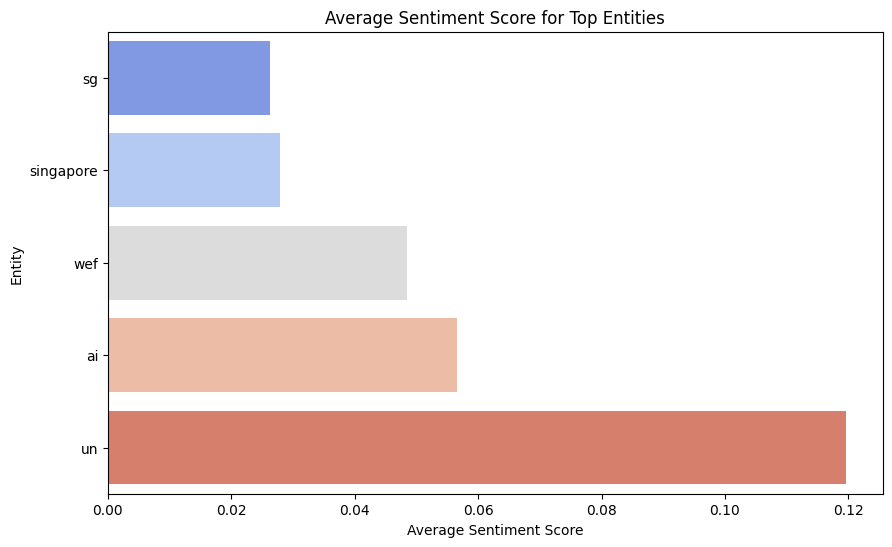

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns



data = []
for user, entities in user_entity_sentiments.items():
    for entity, sentiments in entities.items():
        for sentiment in sentiments:
            data.append({'User': user, 'Entity': entity, 'Sentiment': sentiment})

sentiment_df = pd.DataFrame(data)
top_entities = sentiment_df['Entity'].value_counts().head(5).index
avg_sentiment = sentiment_df[sentiment_df['Entity'].isin(top_entities)].groupby('Entity')['Sentiment'].mean().sort_values()

# Bar chart of average sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sentiment.values, y=avg_sentiment.index, palette='coolwarm')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Entity')
plt.title('Average Sentiment Score for Top Entities')
plt.show()

In [20]:
sentiment_df

,User,Entity,Sentiment
0,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,hypocrisy of climate conferences continues,0.000000
1,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,the world economic forum’s,0.013081
2,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,the world economic forum’s,0.053704
3,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,the world economic forum’s,0.036706
4,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,microsoft,-0.187500
...,...,...,...
1549,TChimpo,titan,0.000000
1550,TChimpo,chill,-0.028148
1551,TChimpo,club of rome,0.000000
1552,TChimpo,ice,0.283333


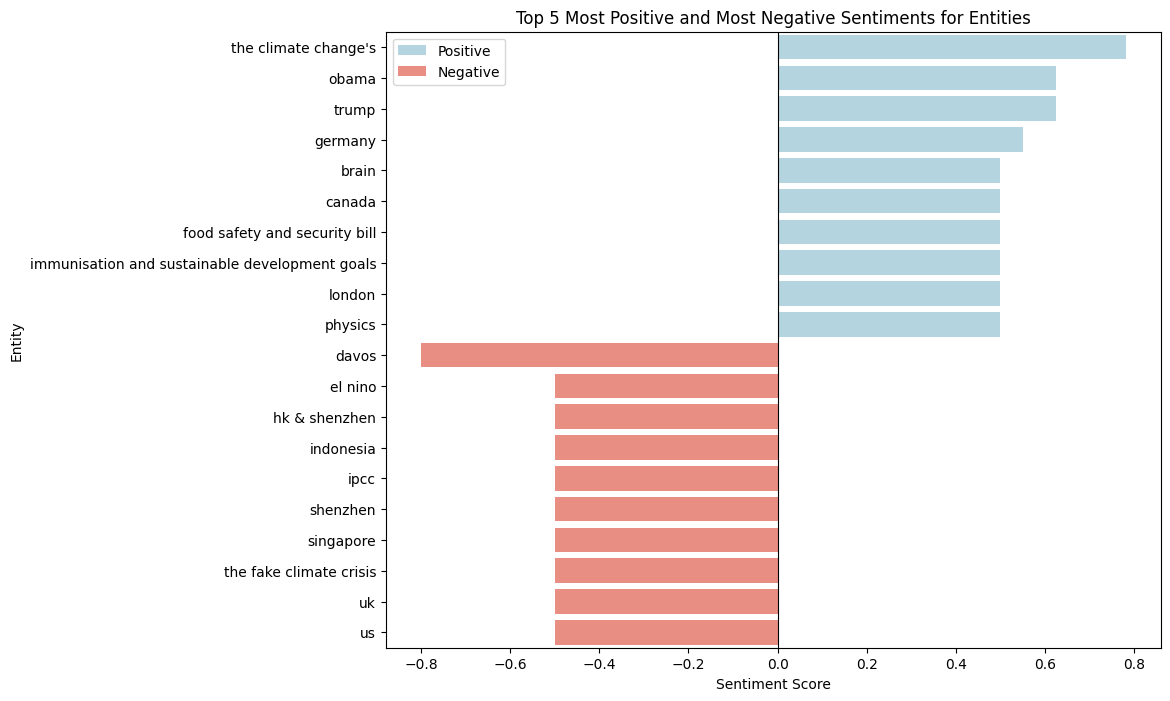

In [21]:
top_positive = sentiment_df.groupby('Entity')['Sentiment'].max().nlargest(10).reset_index(name='Sentiment')
top_negative = sentiment_df.groupby('Entity')['Sentiment'].min().nsmallest(10).reset_index(name='Sentiment')



top_positive['Type'] = 'Positive'
top_negative['Type'] = 'Negative'


top_sentiments = pd.concat([top_positive, top_negative])
op_sentiments = top_sentiments.sort_values(by='Sentiment', ascending=True)


plt.figure(figsize=(10, 8))
sns.barplot(x='Sentiment', y='Entity', hue='Type', data=top_sentiments, dodge=False, palette={'Positive': 'lightblue', 'Negative': 'salmon'})

plt.xlabel('Sentiment Score')
plt.ylabel('Entity')
plt.title('Top 5 Most Positive and Most Negative Sentiments for Entities')
plt.legend()

# Adding a vertical line at 0 to distinguish between positive and negative sentiments
plt.axvline(0, color='black', linewidth=0.8)

plt.show()

In [22]:
top_positive

,Entity,Sentiment,Type
0,the climate change's,0.78125,Positive
1,obama,0.62500,Positive
2,trump,0.62500,Positive
3,germany,0.55000,Positive
4,brain,0.50000,Positive
5,canada,0.50000,Positive
6,food safety and security bill,0.50000,Positive
7,immunisation and sustainable development goals,0.50000,Positive
8,london,0.50000,Positive
9,physics,0.50000,Positive


In [23]:
top_negative

,Entity,Sentiment,Type
0,davos,-0.8,Negative
1,el nino,-0.5,Negative
2,hk & shenzhen,-0.5,Negative
3,indonesia,-0.5,Negative
4,ipcc,-0.5,Negative
5,shenzhen,-0.5,Negative
6,singapore,-0.5,Negative
7,the fake climate crisis,-0.5,Negative
8,uk,-0.5,Negative
9,us,-0.5,Negative


In [24]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [25]:
df

,id,date,person,msg,link,forwarded,entities,spacy_entities,sentiment
2275,2,2021-11-03T20:43:40,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,False,None,[],"(0.0, 0.0)"
2274,3,2021-11-04T01:24:32,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,The Ludicrous Hypocrisy of Climate Conferences...,https://link.theepochtimes.com/mkt_app/the-lud...,False,"[[(Ludicrous, JJ), (Hypocrisy, NNP)], [(Climat...",[Hypocrisy of Climate Conferences Continues],"(0.0, 0.0)"
2273,4,2021-11-08T01:15:55,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,https://www.timescolonist.com/bc-news/bc-docto...,False,None,[],"(0.0, 0.0)"
2272,5,2021-11-12T23:25:30,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,True,None,[],"(0.0, 0.0)"
2271,6,2021-11-13T18:05:29,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,,False,None,[],"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...
4,2594,2024-02-20T00:24:42,TChimpo,The world is not binary. Either good or bad. ...,,False,[],[],"(0.12500000000000003, 0.4583333333333333)"
3,2595,2024-02-20T00:26:24,Henry,Says the person who says “ most large industri...,,False,[],[],"(0.09285714285714289, 0.699047619047619)"
2,2596,2024-02-20T05:40:50,TNanomaly EndTN,"Co-founder of Greenpeace, Patrick Moore, expla...",,True,"[[(Greenpeace, NNP)], [(Patrick, NNP), (Moore,...","[Greenpeace, Patrick Moore, Planet Earth, Tuck...","(-0.06666666666666667, 0.5499999999999999)"
1,2597,2024-02-20T05:44:35,TNanomaly EndTN,"🇳🇱 Dutch MEP Rob Roos says ""climate change"" is...",https://t.me/australiaforfreedom,True,"[[(Dutch, NNP), (MEP, NNP), (Rob, NNP), (Roos,...","[Dutch, Rob Roos]","(0.24545454545454545, 0.7015151515151515)"


In [26]:

#stop_words = set(stopwords.words('english'))  
stopwords = [word for word in stopwords.words('english')]
vectorizer = TfidfVectorizer(max_features=1000, min_df=5,stop_words=stopwords)
tfidf = vectorizer.fit_transform(df['msg'])


num_topics = 5  
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf)

# Displaying topics
feature_names = vectorizer.get_feature_names_out()


Topic #1:
climate change hoax crisis blame narrative wef new earth war


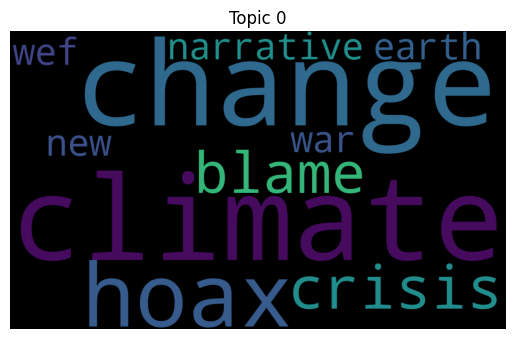

Topic #2:
food global meat wef lab warming eat control world farmers


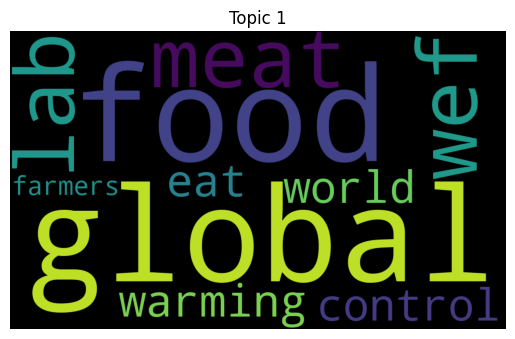

Topic #3:
carbon singapore emissions zero net co2 new world coming would


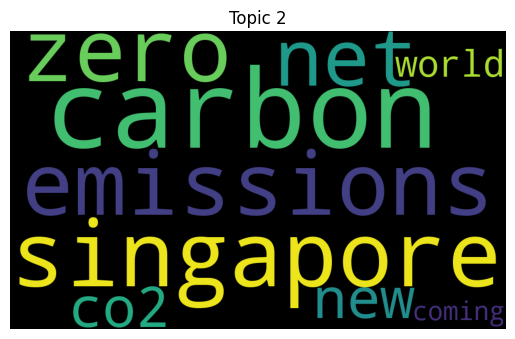

Topic #4:
weather modification manipulation new private cloud cold subscribe seeding since


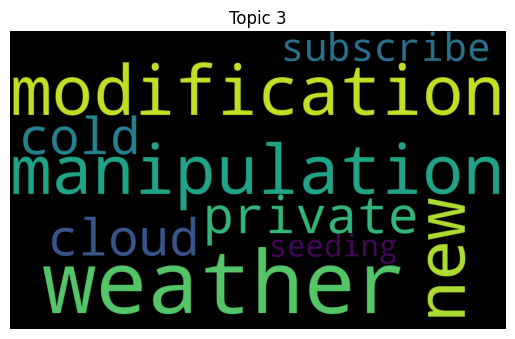

Topic #5:
people want energy one us good need think money industry


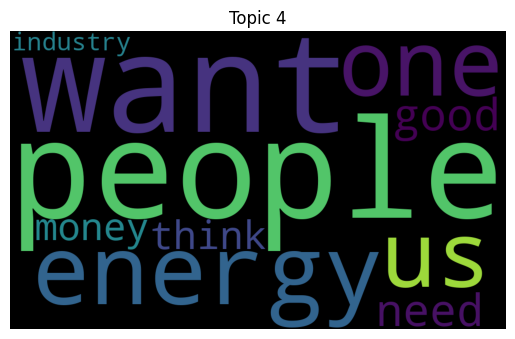

In [27]:
from wordcloud import WordCloud
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.imshow(wc)
    plt.title(f"Topic {topic_idx}")
    plt.axis("off")
    plt.show()

SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏:
climate change blame coming new war global people crisis source


C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129411 (\N{TURKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\pheng\anaconda3\envs\wkw\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127796 (\N{PALM TREE}) missing from current font.
  fig.canvas.print

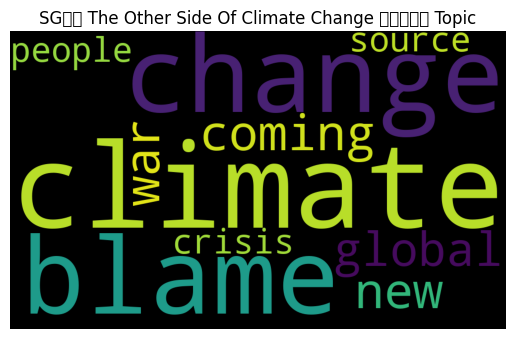

TNanomaly EndTN:
climate change wef crisis global hoax subscribe people private world


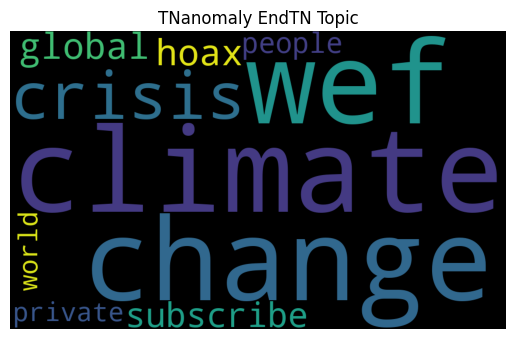

The Science Has Changed:
climate change hoax mind expect changed china agenda energy overuse


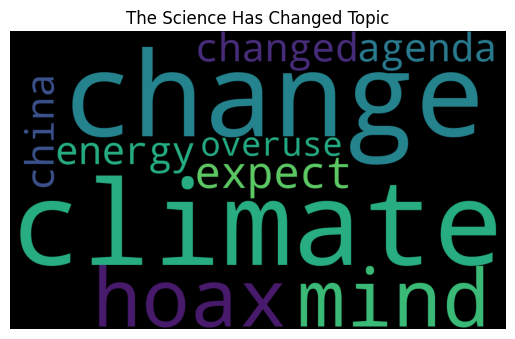

Henry:
climate environmentalists people arguments want industry alarmists believe good conspiracy


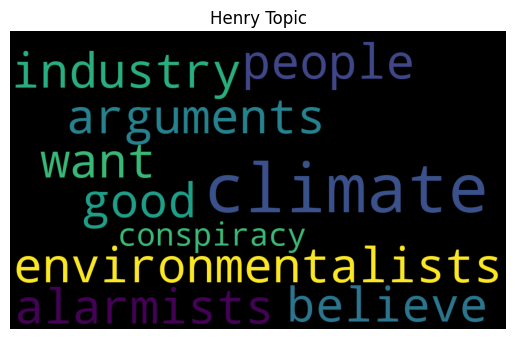

Geoff Smith:
singapore analysis similar zero wonder net policy would published climate


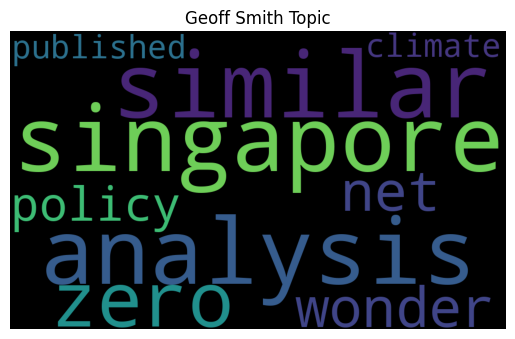

In [28]:
users = ['SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏','TNanomaly EndTN','The Science Has Changed','Henry','Geoff Smith'] #Top 5 active users as observed from the other analysis
for user in users:
    filtered_df = df[df['person'] == user]
    filtered_df
    fil_vectorizer = TfidfVectorizer(max_features=1000, min_df=1,stop_words=stopwords)
    fil_tfidf = fil_vectorizer.fit_transform(filtered_df['msg'])


    num_topics = 1
    fil_nmf = NMF(n_components=num_topics, random_state=42)
    fil_nmf.fit(fil_tfidf)

    # Displaying topics
    feature_names = fil_vectorizer.get_feature_names_out()
    print(f"{user}:")
    for topic_idx, topic in enumerate(fil_nmf.components_):
        print(" ".join([feature_names[i] for i in topic.argsort()[:-10- 1:-1]]))
        wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
        plt.imshow(wc)
        plt.title(f"{user} Topic")
        plt.axis("off")
        plt.show()